# Market Sentiment vs Trader Behavior – Data Science Assignment  
**Candidate:** Gauri Nigam  
**Email:** nigamgauri24@gmail.com  

This notebook explores how trader behavior (PnL, trade size, and trade volume) changes with market sentiment, using a combination of historical trading data and the Fear & Greed Index.

The analysis is based on merging both datasets by date and grouping them by sentiment classifications like Fear, Greed, and Extreme Fear. Visualizations and summary tables are generated to highlight patterns in trader decisions and profitability across different market moods.

---

## Contents of this Project

- Load and clean both datasets
- Merge them on `date`
- Group data by sentiment classification
- Calculate average PnL, trade size, and number of trades
- Visualize comparisons using bar plots
- Export merged data and images for submission


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.listdir("/content/drive/MyDrive/analysis")

['fear_greed_index.csv', 'historical_data.csv']

In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/analysis/fear_greed_index.csv")
print("Columns in sentiment file:", df.columns.tolist())

Columns in sentiment file: ['timestamp', 'value', 'classification', 'date']


In [4]:
trades = pd.read_csv("/content/drive/MyDrive/analysis/historical_data.csv")
print(trades.columns.tolist())

['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [5]:
# Load and format both datasets for merging on 'date'
sentiment = pd.read_csv("/content/drive/MyDrive/analysis/fear_greed_index.csv")
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

trades = pd.read_csv("/content/drive/MyDrive/analysis/historical_data.csv")
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')
trades['date'] = trades['Timestamp IST'].dt.date

print("Sentiment data:")
print(sentiment.head())

print("\nTrading data:")
print(trades.head())


Sentiment data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Trading data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144

In [6]:
# Merge on common 'date' column
merged = pd.merge(trades, sentiment, on='date')

# Show the shape to confirm if there's data or not
print("Merged rows:", merged.shape[0])
merged.head()


Merged rows: 211218


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


In [7]:
# Group by market sentiment classification
summary = merged.groupby('classification').agg({
    'Closed PnL': 'mean',
    'Size USD': 'mean',
    'Coin': 'count'
}).rename(columns={
    'Closed PnL': 'avg_pnl',
    'Size USD': 'avg_trade_size',
    'Coin': 'num_trades'
})

# Display result
summary = summary.sort_values(by='num_trades', ascending=False)
summary


,avg_pnl,avg_trade_size,num_trades
classification,,,
Fear,54.290400,7816.109931,61837
Greed,42.743559,5736.884375,50303
Extreme Greed,67.892861,3112.251565,39992
Neutral,34.307718,4782.732661,37686
Extreme Fear,34.537862,5349.731843,21400


In [8]:
import os
os.makedirs("outputs", exist_ok=True)

/tmp/ipython-input-9-1419079463.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary.reset_index(), x='classification', y='avg_pnl', palette='coolwarm')


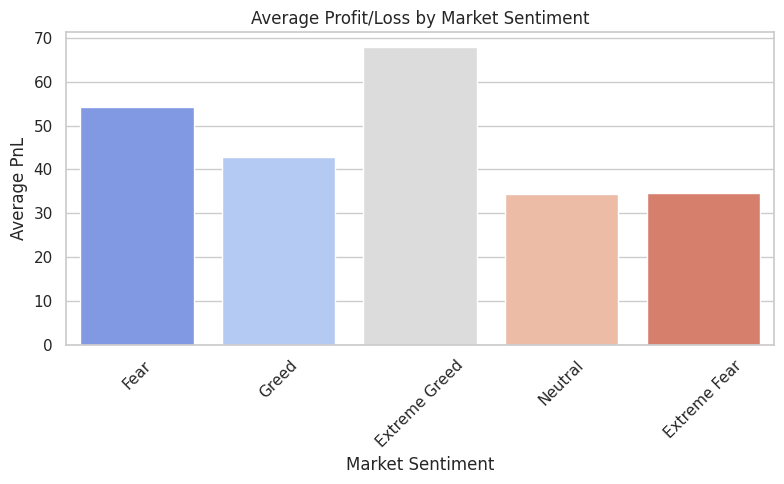

/tmp/ipython-input-9-1419079463.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary.reset_index(), x='classification', y='avg_trade_size', palette='crest')


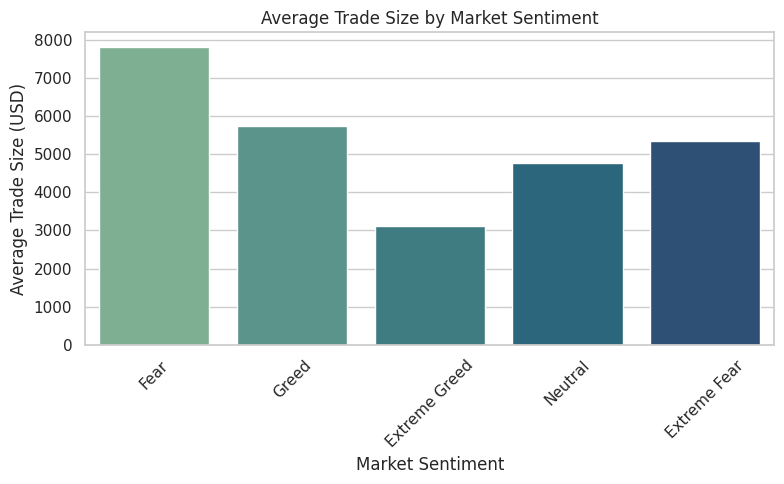

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Plot 1: Average Profit/Loss per sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=summary.reset_index(), x='classification', y='avg_pnl', palette='coolwarm')
plt.title("Average Profit/Loss by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/pnl_comparison.png")
plt.show()

# Plot 2: Average Trade Size per sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=summary.reset_index(), x='classification', y='avg_trade_size', palette='crest')
plt.title("Average Trade Size by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/trade_size_comparison.png")
plt.show()


In [10]:
os.makedirs("csv_files", exist_ok=True)

# Save merged dataset
merged.to_csv("csv_files/merged_trader_sentiment.csv", index=False)
print("Merged data saved to csv_files/merged_trader_sentiment.csv ✅")

Merged data saved to csv_files/merged_trader_sentiment.csv ✅


In [11]:
summary

,avg_pnl,avg_trade_size,num_trades
classification,,,
Fear,54.290400,7816.109931,61837
Greed,42.743559,5736.884375,50303
Extreme Greed,67.892861,3112.251565,39992
Neutral,34.307718,4782.732661,37686
Extreme Fear,34.537862,5349.731843,21400


In [12]:
from google.colab import files
files.download("csv_files/merged_trader_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
files.download("outputs/pnl_comparison.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
files.download("outputs/trade_size_comparison.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>